In [2]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
X,Y = make_circles(n_samples=500,noise=0.05)
print(X.shape,Y.shape)

(500, 2) (500,)


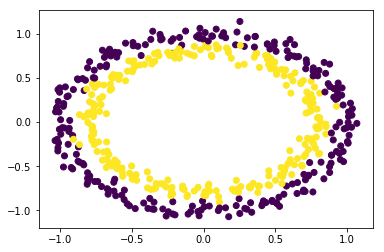

In [6]:
plt.scatter(X[:,0],X[:,1],c= Y)
plt.show()

In [7]:
#non-linear transformation
def phi(X):
    x1 = X[:,0]
    x2 = X[:,1]
    x3 = x1**2 + x2**2
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    X_[:,:-1] = X
    X_[:,-1] = x3
    return X_

In [8]:
X_ = phi(X)

(500, 3)


In [10]:
print(X[:3,:])

[[ 0.87945937  0.65431181]
 [-0.7767232   0.43134259]
 [ 0.19325275  0.72109771]]


In [11]:
print(X_[:3,:])

[[ 0.87945937  0.65431181  1.20157272]
 [-0.7767232   0.43134259  0.78935536]
 [ 0.19325275  0.72109771  0.55732854]]


In [29]:
def plot3d(X,show = True):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111,projection = '3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax.scatter(X1,X2,X3,zdir = 'z',s = 20,c=Y,depthshade =True)
    if(show==True):
        plt.show()
    return ax
    

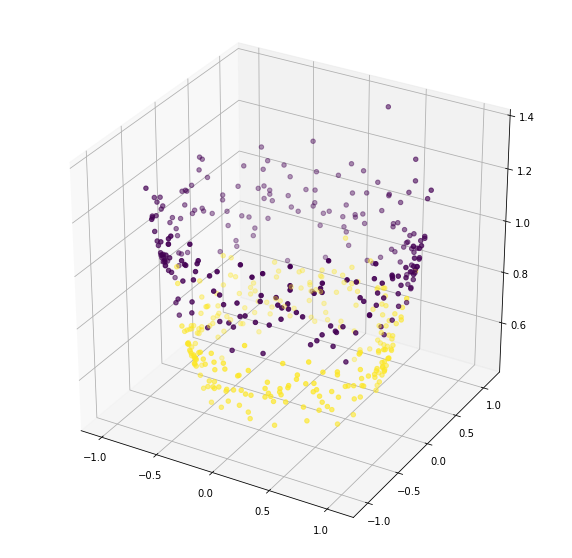

In [33]:
ax = plot3d(X_,False)

In [15]:
##logistic classifier 2d
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [16]:
lr  = LogisticRegression()

In [17]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print(acc)

0.442


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [19]:
##on new data set 3d
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print(acc)

0.968


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [20]:
lr.fit(X_,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
wts = lr.coef_

In [25]:
bias = lr.intercept_

In [23]:
xx,yy =  np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [34]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.8130421  0.81503872 0.81703534 0.81903196]
 [0.80830055 0.81029717 0.81229379 0.81429041]
 [0.80355899 0.80555561 0.80755223 0.80954885]
 [0.79881744 0.80081406 0.80281068 0.8048073 ]]


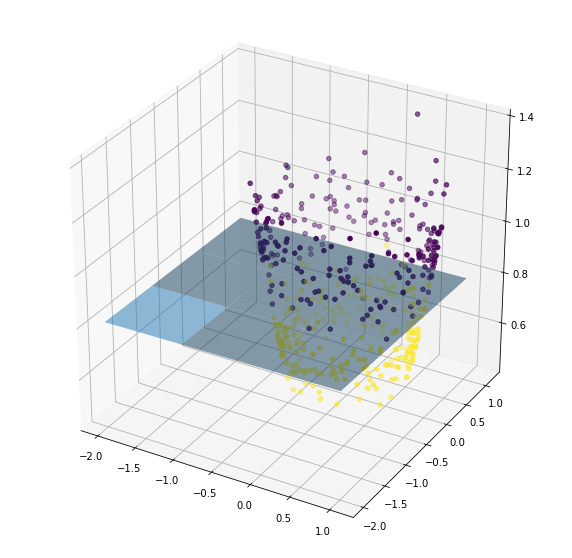

In [35]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha = 0.5)
plt.show()

In [36]:
#kernel SVM
from sklearn import svm

In [41]:
svc = svm.SVC(kernel = 'linear') #using linear kernel

In [42]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
svc.score(X,Y)

0.512

In [44]:
svc = svm.SVC(kernel = 'rbf')

In [45]:
svc.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
svc.score(X,Y)

0.968

In [47]:
svc = svm.SVC(kernel = 'poly')

In [48]:
svc.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
svc.score(X,Y)

0.536

In [51]:
#custom kernel
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T)+1)
svc = svm.SVC(kernel = custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)    

0.97